<a href="https://colab.research.google.com/github/samaksh97/Udacity/blob/main/Udacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os
%matplotlib inline
df1 = pd.read_csv('/root/survey_results_public.csv')
df2 = pd.read_csv('/root/survey_results_schema.csv')

Data Wrangling 


In [10]:
df1.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


In [11]:
df1.shape

(64461, 61)

The final dataset consists of about 64,661 entries with about 60 features. An additional CSV file shows the exact questions the developer were asked. 
Next to a few numerical data features like salary there are many features consisting of categorical data.Lets check the features in schema files


(64461, 61)

In [4]:
schema_feautures = df2['Column']
str(list(schema_feautures))

"['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']"

There seem to be a lot of features available to us. However, we will need only few of them to answer our questions. Lets look at the feature descriptions to make an educated guess of the features we will choose for our analysis.


In [5]:
list(df2[df2.columns[1]])

['Randomized respondent ID number (not in order of survey response time)',
 'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."',
 'Do you code as a hobby?',
 'What is your age (in years)? If you prefer not to answer, you may leave this question blank.',
 'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)',
 'Is that compensation weekly, monthly, or yearly?',
 'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.',
 'Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.',
 'Where do you live?',
 "Which currency do yo

In [8]:
#List of all the coloumns with missing values
print(df1.columns[df1.isnull().any()].to_list()[:10])
print('Number of columns with missing values:',len(df1.columns[df1.isnull().any()].to_list()))

['MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol']
Number of columns with missing values: 60


In [12]:
#columns with more than 30% missing values
print('Number of columns with more the 30% missing values:',len(df1.columns[df1.isnull().mean()>0.30].to_list()))
print(df1.columns[df1.isnull().mean()>0.30].to_list())

Number of columns with more the 30% missing values: 19
['CompFreq', 'CompTotal', 'ConvertedComp', 'DatabaseDesireNextYear', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWOnboardGood', 'NEWOvertime', 'NEWPurchaseResearch', 'OrgSize', 'PurchaseWhat', 'Sexuality', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WorkWeekHrs']


*1.How is education level relevant for breaking into Data Science*


In [ ]:
print(list(df2[df2['Column'] == 'EdLevel']['QuestionText']))

['Which of the following best describes the highest level of formal education that you’ve completed?']


In [ ]:
#Treating Missing Values

In [ ]:
education = df1['EdLevel']
education.value_counts(normalize= True)


Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.462155
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.228309
Some college/university study without earning a degree                                0.126047
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.083074
Associate degree (A.A., A.S., etc.)                                                   0.032091
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.029427
Primary/elementary school                                                             0.016385
Professional degree (JD, MD, etc.)                                                    0.013930
I never completed any formal education                                                0.008584
Name: EdLevel, dtype: float64

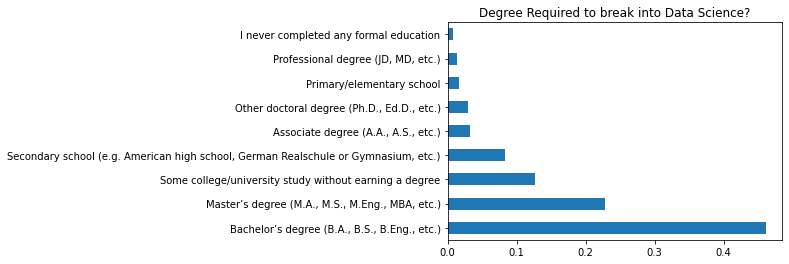

In [ ]:
education.value_counts(normalize= True).plot(kind='barh', title='Degree Required to break into Data Science?')

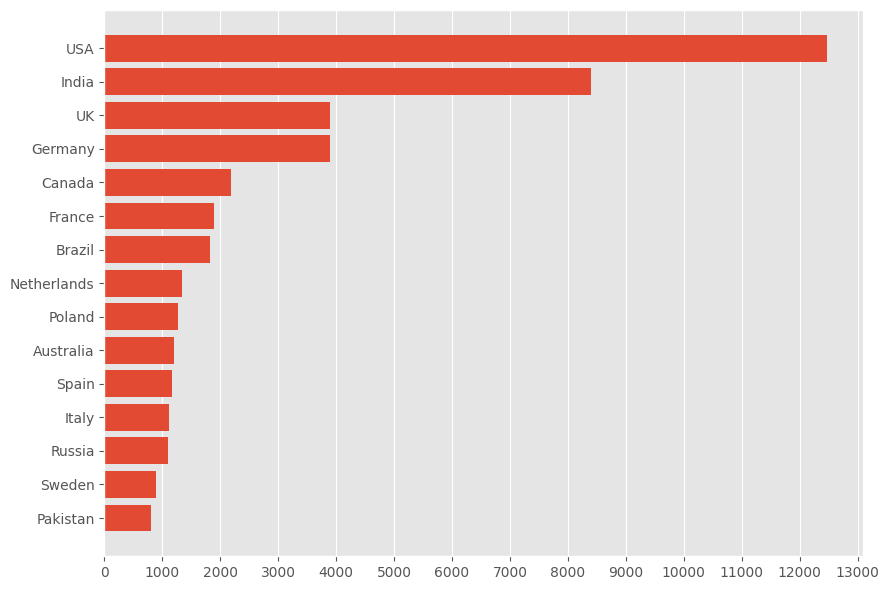

In [18]:
# which countries does the respondednt belong to 
plt.style.use('ggplot')

dft = df1.groupby(['Country']).count().sort_values('Respondent', ascending=False).head(15)
cntrs = list(dft.index)
cntrs[0], cntrs[2], cntrs[-3] = "USA", "UK", "Russia"
cntrs = list(reversed(cntrs))

fig1, ax1 = plt.subplots(figsize=(9,6))
ax1.barh(cntrs, list(reversed(dft['Respondent'])))
ax1.set_xticks(np.arange(0,13001,1000))
ax1.grid(axis='y')
# ax1.set_title('\nTop 15 Countries of Respondents',fontdict={'fontsize':20})
fig1.tight_layout()

plt.style.use('default')

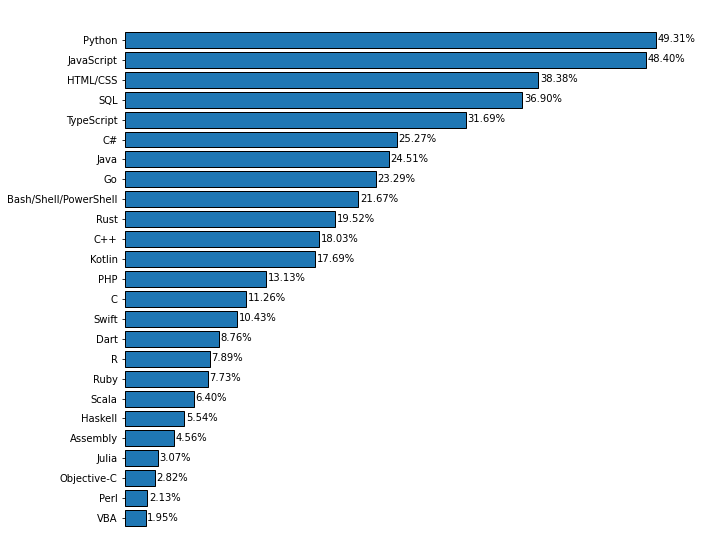

In [15]:
ig , ax = plt.subplots(figsize=(10,10))
# ld that users desire
ld = {}
for x in df1.LanguageDesireNextYear.dropna():
    for d in x.split(';'):
        if d not in ld:
            ld[d] = 1   # create new instance
        else:
            ld[d] += 1  # increments that instance           
ld = {k:v for k,v in sorted(ld.items(), key=lambda x:x[1])}
pos = np.arange(0,len(ld.keys()), 1)
labels = [x for x in ld.keys()]
tot = df1.LanguageDesireNextYear.count()
pcnts = [round(100*x/tot,2) for x in ld.values()]

ax.barh(labels, ld.values(), edgecolor='k')
ax.set_xticks(np.arange(0, max(ld.values())+600, 100))
ax.xaxis.set_ticklabels([])
for (y, p), x  in zip(enumerate(pcnts), ld.values()):
    ax.annotate("%.2f%%"%p, (x+80 ,y-0.125))
ax.xaxis.set_ticks_position('none')
ax.grid(False)
# fig.tight_layout()
# ax.set_title('Languages Desired(wants to work with)' ,fontdict={'fontsize':25}, horizontalalignment='center')
ax.set_frame_on(False)

plt.style.use('default')

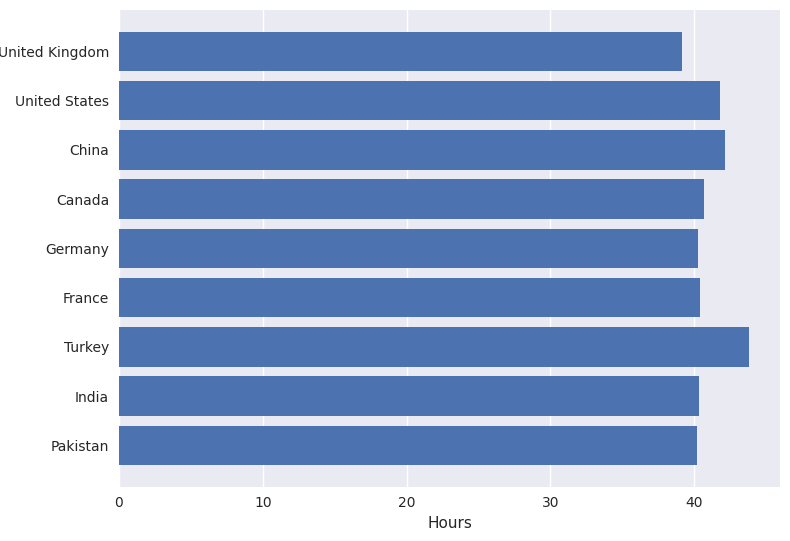

In [17]:
plt.style.use('seaborn')

dft = df1.groupby(['Country']).WorkWeekHrs.mean()
cntr =['Pakistan','India','Turkey','France','Germany','Canada', 'China','United States','United Kingdom']
age = [dft[x] for x in cntr]

fig, ax = plt.subplots()
ax.barh(cntr, age)
ax.set_xlabel('Hours')
ax.grid(axis='y')
# ax.set_title('Average Weekly Work Hours' ,fontdict={'fontsize':20}, horizontalalignment='center')
fig.tight_layout()

plt.style.use('default')